In [1]:
from pyfus.io.tx7332 import TX7332
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
tx = TX7332()

In [3]:
delay_profile = 1
delays = np.arange(32)*1e-6
apodizations = np.ones(32)
frequency = 150e3
cycles = 3
pulse_profile = 1
tx.set_delay_profile(delays=delays, apodizations=apodizations, profile=delay_profile)
tx.set_pulse_profile(frequency=frequency, cycles=cycles, profile=pulse_profile)
dp1 = tx.get_delay_profile(profile=delay_profile)
pp1 = tx.get_pulse_profile(profile=pulse_profile)

delay_profile = 2
x = np.linspace(-0.5, 0.5, 32)*4e-2
r = np.sqrt(x**2 + 5e-2**2)
delays = (r.max()-r)/1500
apodizations = [0,1]*16
frequency = 400e3
cycles = 64
pulse_profile = 2
tx.set_delay_profile(delays=delays, apodizations=apodizations, profile=delay_profile)
tx.set_pulse_profile(frequency=frequency, cycles=cycles, profile=pulse_profile)
dp2 = tx.get_delay_profile(profile=delay_profile)
pp2 = tx.get_pulse_profile(profile=pulse_profile)

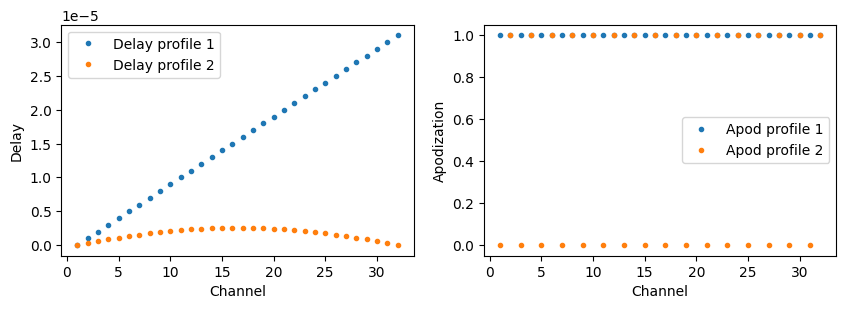

In [4]:
ch = np.arange(1,33)
fig, ax = plt.subplots(1,2, figsize=(10,3))
for i, dp in enumerate([dp1, dp2]):
    ax[0].plot(ch, dp['delays'],'.', label=f'Delay profile {i+1}')
    ax[1].plot(ch, dp['apodizations'],'.', label=f'Apod profile {i+1}')
ax[0].set_ylabel("Delay")
ax[1].set_ylabel("Apodization")
for axi in ax:
    axi.set_xlabel("Channel")
    axi.legend()

In [5]:
for i, dp, in enumerate([dp1, dp2]):
    print(f'PROFILE {i+1}')
    print("[DELAY_CTRL]:")
    for addr, val in dp['registers'].items():
        print(f'0x{addr:X}:x{val:08X}')
    print("[DELAY]")
    for addr, val in dp['delay_registers'].items():
        print(f'0x{addr:X}:x{val:08X}')
    print("")


PROFILE 1
[DELAY_CTRL]:
0x16:x00000000
0x1B:x00000000
[DELAY]
0x20:x07C00740
0x21:x06C0063F
0x22:x05C00540
0x23:x04BF0440
0x24:x077F0700
0x25:x06800600
0x26:x05800500
0x27:x04800400
0x28:x03BF0340
0x29:x02C00240
0x2A:x01C00140
0x2B:x00C00040
0x2C:x03800300
0x2D:x02800200
0x2E:x01800100
0x2F:x00800000

PROFILE 2
[DELAY_CTRL]:
0x16:x10001000
0x1B:x55555555
[DELAY]
0x30:x00000026
0x31:x00480065
0x32:x007C008E
0x33:x009B00A2
0x34:x00130038
0x35:x00570071
0x36:x00860096
0x37:x009F00A4
0x38:x00A4009F
0x39:x00960086
0x3A:x00710057
0x3B:x00380013
0x3C:x00A2009B
0x3D:x008E007C
0x3E:x00650048
0x3F:x00260000



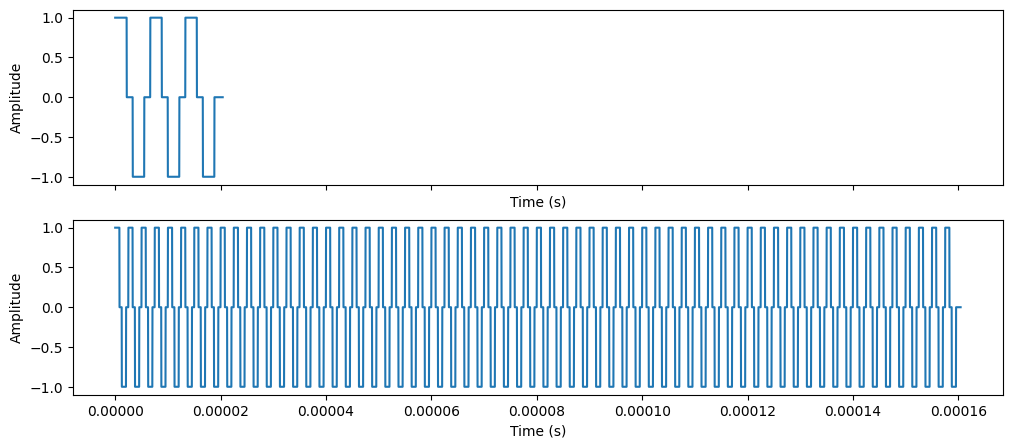

In [14]:
fig, ax = plt.subplots(2,1, figsize=(12,5), sharex=True)
for i, pp in enumerate([pp1, pp2]):
    ax[i].plot(pp['t'],pp['y'],'-', label=f'Pulse profile {i+1}')
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Amplitude")

In [7]:
pp2

{'frequency': 400000.0,
 'duty_cycle': 0.66,
 'cycles': 64.0,
 'tail_count': 29,
 'invert': False,
 'clk_div': 1,
 'repeat': 0,
 'elastic_repeat': 640,
 'elastic_mode': 1,
 't': array([0.00000000e+00, 1.56250000e-08, 3.12500000e-08, ...,
        1.60406250e-04, 1.60421875e-04, 1.60437500e-04]),
 'y': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,

In [8]:
for i, pp, in enumerate([pp1, pp2]):
    print(f'PROFILE {i+1}')
    print("[PULSE_CTRL]:")
    for addr, val in pp['registers'].items():
        print(f'0x{addr:X}:x{val:08X}')
    print("[PULSE]")
    for addr, val in pp['pattern_registers'].items():
        print(f'0x{addr:X}:x{val:08X}')
    print("")

PROFILE 1
[PULSE_CTRL]:
0x18:x02000003
0x19:x00000744
0x1E:x00000000
0x1F:x00000000
[PULSE]
0x120:xF2F2F2F2
0x121:x38F0F052
0x122:xF1F1F1F1
0x123:x38F0F051

PROFILE 2
[PULSE_CTRL]:
0x18:x02000003
0x19:x00280F40
0x1E:x00000001
0x1F:x00000001
[PULSE]
0x124:xF1D092F2
0x125:x0007D091
0x126:x00000000
0x127:x00000000



In [9]:
print("[ALL_REGS]")
for addr, val in tx.registers.items():
    print(f'0x{addr:X}:x{val:08X}')

[ALL_REGS]
0x0:x00000000
0x1:x00000000
0x6:x00000000
0xB:x00000000
0xC:x00000000
0xF:x00000000
0x14:x00000000
0x15:x00000000
0x16:x00000000
0x18:x02000003
0x19:x00000744
0x1E:x00000000
0x1F:x00000000
0x1A:x00000000
0x1B:x00000000
0x20:x07C00740
0x21:x06C0063F
0x22:x05C00540
0x23:x04BF0440
0x24:x077F0700
0x25:x06800600
0x26:x05800500
0x27:x04800400
0x28:x03BF0340
0x29:x02C00240
0x2A:x01C00140
0x2B:x00C00040
0x2C:x03800300
0x2D:x02800200
0x2E:x01800100
0x2F:x00800000
0x30:x00000026
0x31:x00480065
0x32:x007C008E
0x33:x009B00A2
0x34:x00130038
0x35:x00570071
0x36:x00860096
0x37:x009F00A4
0x38:x00A4009F
0x39:x00960086
0x3A:x00710057
0x3B:x00380013
0x3C:x00A2009B
0x3D:x008E007C
0x3E:x00650048
0x3F:x00260000
0x40:x00000000
0x41:x00000000
0x42:x00000000
0x43:x00000000
0x44:x00000000
0x45:x00000000
0x46:x00000000
0x47:x00000000
0x48:x00000000
0x49:x00000000
0x4A:x00000000
0x4B:x00000000
0x4C:x00000000
0x4D:x00000000
0x4E:x00000000
0x4F:x00000000
0x50:x00000000
0x51:x00000000
0x52:x00000000
0x53: